<a href="https://colab.research.google.com/github/nisha1365/GEN-AI-POC/blob/main/New_tweet_piechart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
topics_list = pd.read_csv("/content/topic_info_filtered.csv")
topics_list

,Topic,Count,Name,Representation,Representative_Docs
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day..."
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...
...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...


In [5]:
!pip install cohere tiktoken

In [6]:
!pip install openai==0.28

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 2.1 MB/s eta 0:00:00


In [7]:
import os
import openai

# Set up your OpenAI API key


openai.api_type = "azure"
openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
openai.api_version = "2023-05-15"

def generate_proper_topic_names(topic_names):
    proper_names = []
    for topic_name in topic_names:
        # Prompt to generate a proper topic name
        prompt = f"Generate a proper topic name for '{topic_name}'."

        # Call the OpenAI API to generate a proper topic name
        response = openai.Completion.create(
            engine="GenAI",
            prompt=prompt,
            max_tokens=50,
            n=1,
            stop=None,
            temperature=0.7,
        )

        # Extract the generated topic name from the response
        generated_name = response['choices'][0]['text'].strip()

        # Check if the generated name is empty or null
        if generated_name == "":
            # Use the original topic name as a fallback
            generated_name = topic_name

        proper_names.append(generated_name)

    return proper_names



# Generate proper topic names for the Name column
topic_names =topics_list['Name'].tolist()
topics_list['Proper_Topic_Names'] = generate_proper_topic_names(topic_names)

In [8]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...","""0-Day Hemophilia/Haemophilia Care"""
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,Hemgenix FDA Genetherapy: Impact on 1_viii Pat...
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Blood: A Look at the Risk...
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosomal Inbreeding among Cousins
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,"""March Bleeding Disorders Awareness Month: Und..."
...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,"""94-Mary's Trip to Madison Lake in Nebraska"""
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,95_Corticosteroid-Induced Adrenal Insufficienc...
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,'96 Medicaid Renewal Process for State Consumers'
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,The '97 Mankyblood Scandal: Accountability and...


In [9]:
topics_list.to_csv("Openai_topic_names.csv", index = False)

In [ ]:
!pip install sentence-transformers

In [12]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import numpy as np

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Encode the proper topic names into vectors using the sentence transformer model
topic_name_embeddings = model.encode(topics_list['Proper_Topic_Names'], convert_to_tensor=True)

# Perform KMeans clustering on the embeddings
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(topic_name_embeddings)

# Add the cluster labels to the topics list dataframe
topics_list['Cluster_Labels'] = cluster_labels

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
topics_list

,Topic,Count,Name,Representation,Representative_Docs,Proper_Topic_Names,Cluster_Labels
0,0,11951,0_day_hemophilia_haemophilia_care,"['day', 'hemophilia', 'haemophilia', 'care', '...","['world hemophilia day', 'world hemophilia day...","""0-Day Hemophilia/Haemophilia Care""",1
1,1,3131,1_viii_hemgenix_fda_genetherapy,"['viii', 'hemgenix', 'fda', 'genetherapy', 'pf...",['gene therapy for the treatment of hemophilia...,Hemgenix FDA Genetherapy: Impact on 1_viii Pat...,7
2,2,1236,2_contaminatedblood_hiv_contaminated_blood,"['contaminatedblood', 'hiv', 'contaminated', '...",['infected blood inquiry parent and child who ...,HIV Contamination in Blood: A Look at the Risk...,7
3,3,948,3_victoria_chromosome_inbreeding_cousin,"['victoria', 'chromosome', 'inbreeding', 'cous...",['why is hemophilia sometimes called the royal...,Victoria's Chromosomal Inbreeding among Cousins,2
4,4,600,4_march_bleedingdisordersawarenessmonth_bleedi...,"['march', 'bleedingdisordersawarenessmonth', '...",['march is bleeding disorder awareness month h...,"""March Bleeding Disorders Awareness Month: Und...",1
...,...,...,...,...,...,...,...
94,94,16,94_mary_nebraska_madison_lake,"['mary', 'nebraska', 'madison', 'lake', 'mix',...",['enjoying a few dozen bloody mary at the nebr...,"""94-Mary's Trip to Madison Lake in Nebraska""",1
95,95,16,95_corticosteroid_adrenal_insufficiency_gurnell,"['corticosteroid', 'adrenal', 'insufficiency',...",['guidance on testing for adrenal insufficienc...,95_Corticosteroid-Induced Adrenal Insufficienc...,1
96,96,15,96_medicaid_renewal_state_consumer,"['medicaid', 'renewal', 'state', 'consumer', '...",['medicaid consumer renewal are coming back ma...,'96 Medicaid Renewal Process for State Consumers',3
97,97,15,97_scandal_mankyblood_accountabilty_wallowing,"['scandal', 'mankyblood', 'accountabilty', 'wa...",['time journalist got their head around this s...,The '97 Mankyblood Scandal: Accountability and...,3


In [14]:
topics_list['Cluster_Labels'].value_counts()

1    30
3    19
4    15
7    10
2     7
6     7
0     4
9     3
8     3
5     1
Name: Cluster_Labels, dtype: int64

<ipython-input-16-89ba4bb186df>:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


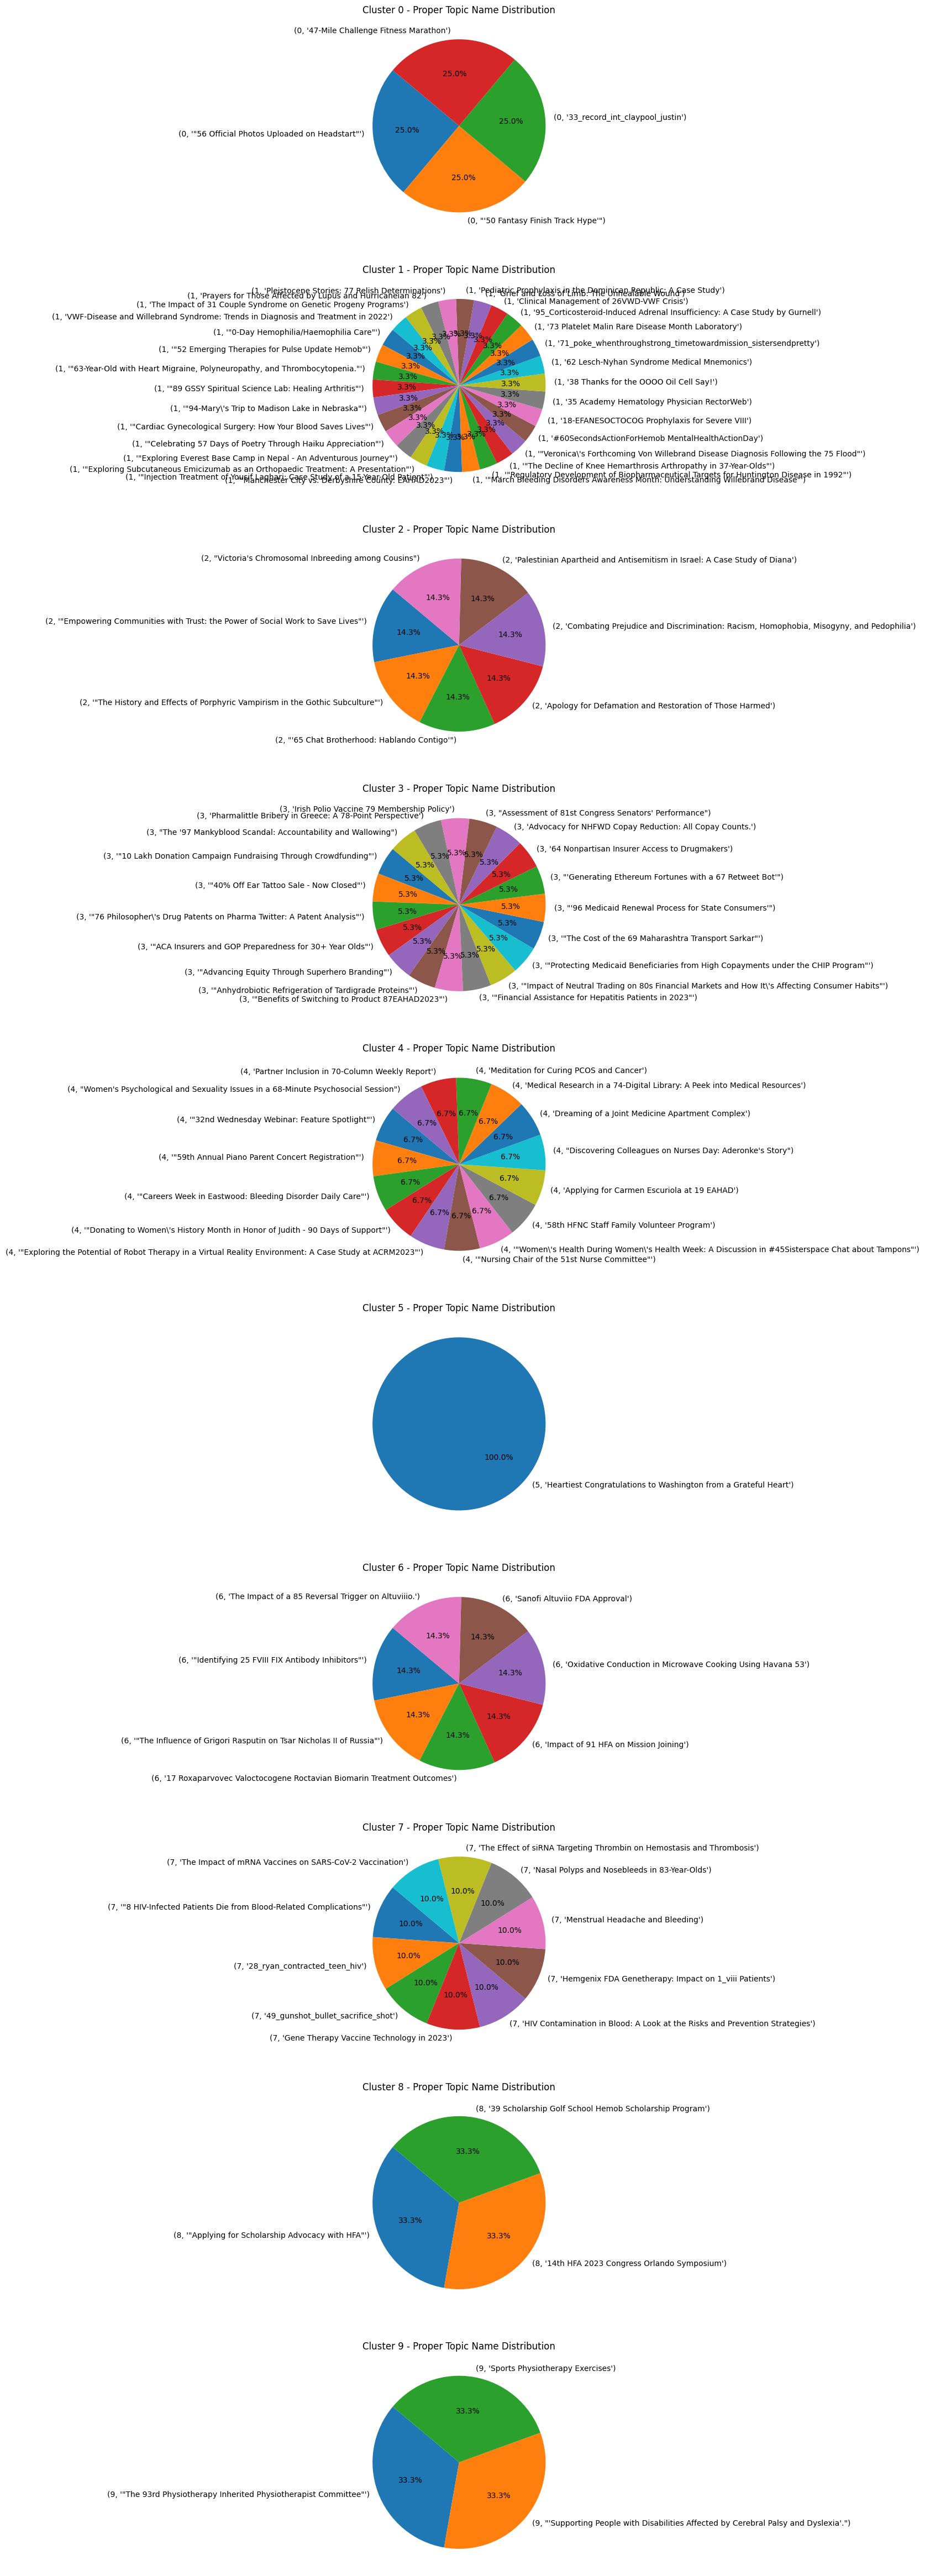

In [16]:
import matplotlib.pyplot as plt

# Group the dataframe by cluster labels and count the occurrences of each proper topic name
cluster_counts = topics_list.groupby('Cluster_Labels')['Proper_Topic_Names'].value_counts()

# Plot a pie chart for each cluster
num_clusters = len(cluster_counts.index.levels[0])
fig, axs = plt.subplots(num_clusters, figsize=(6, 6 * num_clusters))
for i, (cluster_label, counts) in enumerate(cluster_counts.groupby(level=0)):
    axs[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    axs[i].set_title(f'Cluster {cluster_label} - Proper Topic Name Distribution')
plt.tight_layout()
plt.show()

In [18]:
import plotly.express as px
# add cluster labels to dataframe
topics_list['Cluster_Labels'] = kmeans.labels_

# count number of topics in each cluster
cluster_counts =topics_list['Cluster_Labels'].value_counts().sort_index()

# create pie chart using Plotly
fig = px.pie(
    names=cluster_counts.index,
    values=cluster_counts.values,
    title="Cluster Distribution"
)

# show the pie chart
fig.show()

In [40]:
import pandas as pd
import re
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import plotly.express as px

# Load a pre-trained sentence transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Function to clean the input tweet
def clean_tweet(tweet):
    # Convert to lowercase
    tweet = tweet.lower()
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove mentions and hashtags
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)
    # Remove punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    return tweet

# Function to generate a proper topic name using OpenAI
def generate_proper_topic_name(tweet):
    # Set up OpenAI API parameters
    openai.api_type = "azure"
    openai.api_key = "1b9938c280974153ad1e7cabc7580f11"
    openai.api_base = "https://cognizantaimlopenaidemoaccount.openai.azure.com/"
    openai.api_version = "2023-05-15"

    # Prompt to generate a proper topic name
    prompt = f"Generate a proper topic name for '{tweet}'."

    # Call the OpenAI API to generate a proper topic name
    response = openai.Completion.create(
        engine="GenAI",
        prompt=prompt,
        max_tokens=50,
        n=1,
        stop=None,
        temperature=0.6,
    )

    # Extract the generated topic name from the response
    generated_name = response['choices'][0]['text'].strip()

    # Check if the generated name is empty or null
    if generated_name == "":
        # Use the original tweet as a fallback
        generated_name = tweet

    return generated_name

# Function to predict the cluster label for a proper topic name
def predict_cluster(topic_name, model, kmeans, similarity_threshold=0.7):
    # Encode the topic name into a vector using the sentence transformer model
    topic_name_embedding = model.encode(topic_name, convert_to_tensor=True).unsqueeze(0)
    # Predict the cluster label using the pre-trained KMeans model
    cluster_label = kmeans.predict(topic_name_embedding)[0]
    return cluster_label

# User input: new tweet
new_tweet = input("Enter a new tweet: ")

# Clean the input tweet
cleaned_tweet = clean_tweet(new_tweet)

# Generate a proper topic name for the cleaned tweet using OpenAI
proper_topic_name = generate_proper_topic_name(cleaned_tweet)

# Predict the cluster label for the proper topic name
cluster_label = predict_cluster(proper_topic_name, model, kmeans)

# Assign the new proper topic name to the existing cluster or create a new "other" cluster if not similar to existing ones
if cluster_label in topics_list['Cluster_Labels'].unique():
    # Assign to existing cluster
    topics_list.loc[topics_list['Cluster_Labels'] == cluster_label, 'Proper_Topic_Names'] = proper_topic_name
else:
    # Create a new "other" cluster
    new_cluster_label = topics_list['Cluster_Labels'].max() + 1
    topics_list.loc[len(topics_list)] = [proper_topic_name, new_cluster_label]
    cluster_label = new_cluster_label  # Update cluster_label with the new cluster

    # Print where the new tweet has gone
    print(f"The new tweet '{proper_topic_name}' has been assigned to Cluster {new_cluster_label}.")

# Update the pie chart
cluster_counts = topics_list['Cluster_Labels'].value_counts().reset_index(name='Count')
cluster_counts = cluster_counts.rename(columns={'index': 'Cluster_Labels'})

# Include "Other" category with count 0 if it doesn't exist
if 'Other' not in cluster_counts['Cluster_Labels'].values:
    other_row = pd.DataFrame({'Cluster_Labels': ['Other'], 'Count': [0]})
    cluster_counts = cluster_counts.append(other_row, ignore_index=True)

# Increment the count of the assigned cluster or "Other" if it was a new cluster
if cluster_label == 'Other':
    cluster_counts.loc[cluster_counts['Cluster_Labels'] == 'Other', 'Count'] += 1
else:
    cluster_counts.loc[cluster_counts['Cluster_Labels'] == cluster_label, 'Count'] += 1

# Plot the updated pie chart using Plotly Express
fig = px.pie(cluster_counts, values='Count', names='Cluster_Labels', title='Distribution of Topics Across Clusters')
fig.show()


Enter a new tweet: i am in support of hemophilia campaign


<ipython-input-40-f0167bfb0969>:93: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison

<ipython-input-40-f0167bfb0969>:95: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

